# Lab-02  Crossvalidation,  gridSearch, pipelines with KKN Classification and Regression

**Created by Dr. James G. Shanahan**


## Goals of this lab
* Section 2: Review  K-fold cross-validation
   * parameter tuning using cross_val_score
* Sections 3 Review os K Nearest Neighbors (KNN) with cross-validation
* Sections 4 and 5: Introduce GridSearchCV(a more efficient form parameter tuning)
   * Searching multiple parameters simultaneously
* Section 6: Introduce pipelines as means of setting up workflows that can be repeated easily
   * these pipelines can be used in GridSearches in the case of classification or regression
   * you avoid leakage
* Task: complete a casestudy of KNN hyperparameter tuning for a classification problem

## Next time
* Task:  KNN hyperparameter tuning for a regression problem
* Utility maximization via Gridsearch (maximize utility == minimize MSE)




## An end-to-end Machine Learning pipeline

<img src="attachment:image.png" width=600 align=left>

# K nearest neighbors (KNN) refresher: for regression

The K-Nearest Neighbors (KNN) Algorithm is a robust, extremely simple, and very popular machine learning method. It’s simple to implement but still a competitive and performant machine learning technique. For more background on KNN, see [WikiPedia](https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm)

## Training a KNN model
Training a KNN model simply reduces to following:
* storing your training data, 
* a storing hyper parameters such as 
  * the and the number of neighbors used
  * the similar metric or distance metric used
  * other hyperparameters to be discussed below.
  
In short the  whole training data set is your model. REPEAT: the whole training data set is your model (i.e., you need to store it and consult each example when making a prediction). This is very different to, say, linear regression models where the model is just the slope and intercept in the case of simple linear regression (a single input variable). In addition, the training data can be discarded after learning the slope and intercept.

## Prediction using a KNN model
Making a prediction using a KNN model involves all the training data.

### Prediction STEPS:

1. Find the K nearest neighbors of x (according to a predefined similarity metric).
* Aggregate the K nearest neighbors into a single “prediction” or “classification” value. 
  * You can use any aggregator function such as average, mean, max, min, etc.
  * So far, for classification, we have used the most frequent class in the nearest neighbors (from the training data) as the class. If there ties, pick a class randomly.
  * For regression we can think of many possible aggregation functions, average being the most popular.
  
## KNN for a simple regression problem: house price prediction

Suppose, your company sells homes for clients. It has acquired a large database of customers and  house prices.

One day, your client asks how much he can expect to pay for a house with 52 square meters.  You query your KNN “model” and it immediately gives you the response $\$33,167$. And indeed, your client finds a home for $\$33,489$ the same week. How did the KNN system come to this surprisingly accurate prediction?

It simply calculated the K=3 nearest neighbors to the query “D=52 square meters” from the model with regards Euclidean distance. The three nearest neighbors are A, B, and C with prices $\$34,000$, $\$33,500$, and $\$32,000$, respectively. In the final step, the KNN aggregates the three nearest neighbors by calculating the simple average. As K=3 in this example, we denote the model as `3NN`.

Of course, you can vary the similarity functions, the parameter K, and the aggregation method to come up with more sophisticated prediction models. This example is presented graphichally below.

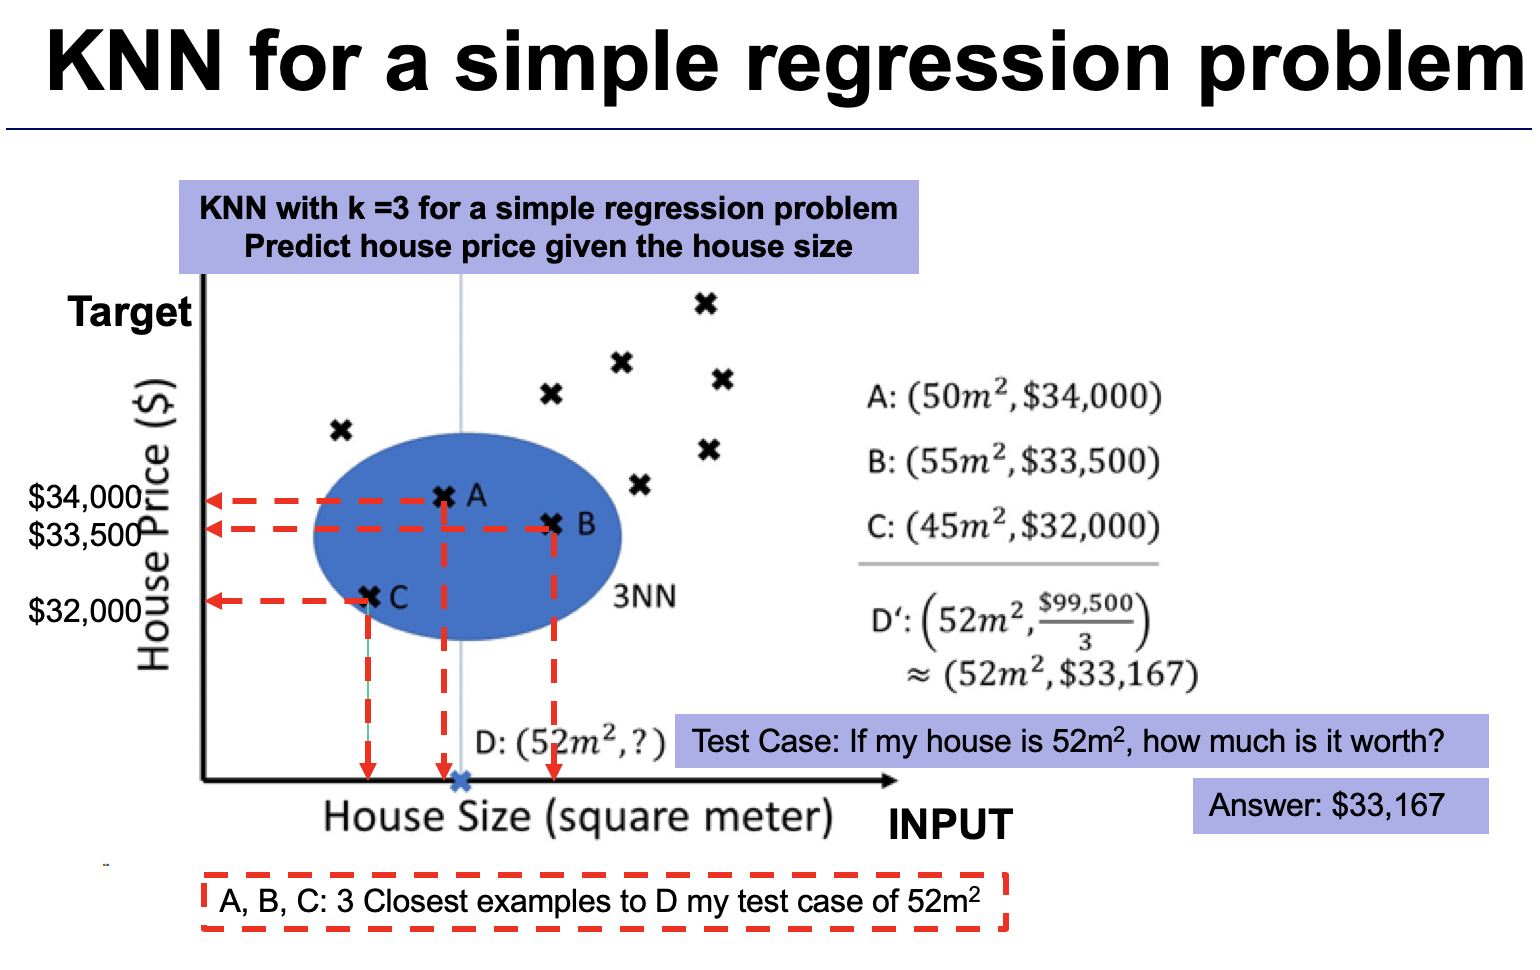

**Figure: KNN where k = 3 for a simple regression model. [Example based on source](https://blog.finxter.com/k-nearest-neighbors-as-a-python-one-liner/)**

## Some Theory: Prediction, including both classification and regression
<p>Let’s fix our setting. As usual, we have a database of <span class="math inline">\(n\)</span> items, represented as vectors of <span class="math inline">\(p\)</span> features. Following the usual notation for regression courses, we’ll write this as an <span class="math inline">\(n\times p\)</span> matrix <span class="math inline">\(\mathbf{x}\)</span>; the vector for data-point <span class="math inline">\(i\)</span> will be <span class="math inline">\(\vec{x}_i\)</span>. (To get to this point, we may have done some dimension reduction as a pre-processing step, but that won’t matter for us here.) Beyond these features, we have an additional variable for each item that we want to <strong>predict</strong>, based on the features. We’ll write it <span class="math inline">\(y_i\)</span> for data-point <span class="math inline">\(i\)</span>, compiled into the <span class="math inline">\(n\times 1\)</span> matrix <span class="math inline">\(\mathbf{y}\)</span> (again, this is regression notation). This variable is called the <strong>label</strong>, <strong>outcome</strong>, <strong>target</strong>, <strong>output</strong> or (oddly) <strong>dependent variable</strong> (sometimes even just called the <strong>predictand</strong>).</p>
<p>A prediction here is going to be a function of the features which outputs a guess (“point prediction”) about the outcome or label.</p>
<ul>
<li><strong>Regression</strong>: <span class="math inline">\(y\)</span> is a continuous numerical variable, so the <strong>regression function</strong> should map <span class="math inline">\(\vec{x}\)</span> to a number.</li>
<li><strong>Classification</strong>: <span class="math inline">\(y\)</span> is binary, so the <strong>classification rule</strong> should map <span class="math inline">\(\vec{x}\)</span> to 0 or 1.
<ul>
<li>Multi-class classification works similarly but with more notation.</li>
</ul></li>
</ul>

## Nearest neighbors as a predictor
<p>This is where nearest neighbors comes in.</p>
<p>In this context, “distance” always refers to distances between the <span class="math inline">\(p\)</span>-dimensional feature vectors. The <strong>nearest neighbor</strong> of a vector <span class="math inline">\(\vec{x}\)</span> is the <span class="math inline">\(\vec{x}_i\)</span> closest to it. The <span class="math inline">\(k\)</span> nearest neighbors are the <span class="math inline">\(k\)</span> vectors <span class="math inline">\(\vec{x}_i\)</span> closest to <span class="math inline">\(\vec{x}\)</span>. (Notice that these definitions make sense whether or not <span class="math inline">\(\vec{x}\)</span> is also one of the <span class="math inline">\(\vec{x}_i\)</span>.) We will often need a way of keeping track of the indices of the neighbors, so we’ll write <span class="math inline">\(NN(\vec{x}, j)\)</span> for the index of the <span class="math inline">\(j^{\mathrm{th}}\)</span> nearest neighbor of <span class="math inline">\(\vec{x}\)</span>.</p>
<p>The k-nearest-neighbor estimate of the regression function is then the average value of the response over the <span class="math inline">\(k\)</span> nearest neighbors: <span class="math display">\[
\hat{\mu}(\vec{x}) = \frac{1}{k}\sum_{j=1}^{k}{y_{NN(\vec{x}, j)}}
\]</span> For classification, we similarly average the labels of neighbors to estimate <span class="math inline">\(p(\vec{x})\)</span>, <span class="math display">\[
\hat{p}(\vec{x}) = \frac{1}{k}\sum_{j=1}^{k}{y_{NN(\vec{x}, j)}}
\]</span> and then threshold it: <span class="math display">\[
\hat{c}(\vec{x}) = \mathbf{1}(\hat{p}(\vec{x}) \geq 0.5)
\]</span></p>
</div>

### Similarity as distance
K Nearest Neighbors classier is the simplest **metric** classifier. The idea behind it is to find $k$ most *similar* objects and make a classification decision based on them. To formalize the notion of similarity one should introduce the measure of the difference. Here we're going to use $L_p$ norm and induced metric.

$$
d_p(\mathbf{x}_1, \mathbf{x}_2) = \|\mathbf{x}_1 - \mathbf{x}_2\|_p = \left( \sum_{j=1}^{m}\left| x_{1, \,j} - x_{2, \,j} \right|^p \right)^{1/p}
$$

There are special names for some of the $L_p$ metrics:
* $p=1$ is Manhattan distance
* $p=2$ is Euclidian distance

For other metrics one can see [here](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.DistanceMetric.html)

The process of learning for KNN classifier is no more than just remembering all the training examples to find the closest one later on. There are smart ways (such as [KD trees](https://en.wikipedia.org/wiki/K-d_tree)) of storing training objects to be able to find nearest one very fast (faster than simply scanning through all of them). But here you need to implement it as a simple **array**.

For the prediction the following strategy is used:
* Find $k$ closest examples from train set
* Find the most frequent label among these $k$ closest objects (if there are few labels with the same number of objects than pick any label from those)
* Assign this label to new object

## KNN one-liner using SKLearn

In [4]:
## Dependencies
from sklearn.neighbors import KNeighborsRegressor
import numpy as np


## Training Data (House Size (square meters)
## A single input variable
X = np.array([[35], [45], [40],
              [35], [25], [40]])

## Target or output variable 
## house price in $ (very cheap houses!)
y = np.array([30000,  45000, 50000, 35000, 32500, 40000])

## One-liner using SKLearn's built-in KNN
## use a bench mark to verify your homegrown version
KNN = KNeighborsRegressor(n_neighbors=3).fit(X, y)


## Test Case with a house size of 30 squared meters
test_case = [30]
predicted_house_price = KNN.predict([test_case])
print(f"predicted_house_price for a {test_case} square meter house is  ${predicted_house_price[0]}")

predicted_house_price for a [30] square meter house is  $32500.0


First, we create a new machine learning model called `KNeighborsRegressor()`. If you would like to take KNN for classification, you would take the model `KNeighborsClassifier`.

Second, we “train” the model using the `fit()` function with two parameters. The first parameter defines the input (the house size) and the second parameter defines the output (the house price). The shape of both parameters must be so that each observation is an array-like data structure .

`KNeighborsRegressor()` expects the input data as 2D NumPy array as an input to the fit function; the function would not work properly because it expects an array of (array-like) observations – and not an array of integers.

In [5]:
X 

array([[35],
       [45],
       [40],
       [35],
       [25],
       [40]])

In [6]:
y

array([30000, 45000, 50000, 35000, 32500, 40000])

### KNN Regression graphically

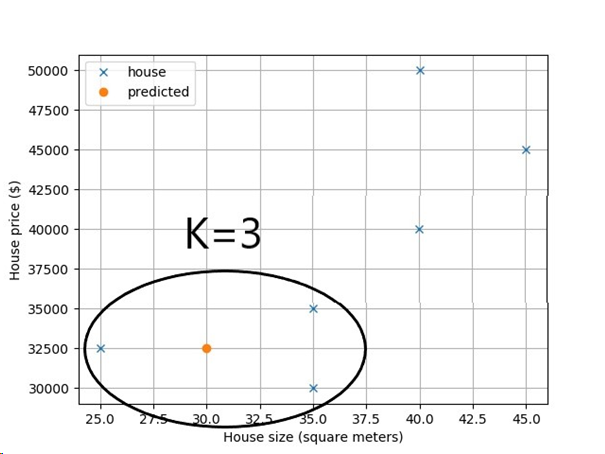

The KNN algorithm finds the three closest houses with respect to house size and averages the predicted house price as the average of the K=3 nearest neighbors.

Thus, the result is $ \$32,500$.

# Cross Validation

## Which model? Which pipeline?

**Motivation:** We need an objective way to choose make data-driven decisions. For example how do we choose between different machine learning models?

* Hypothesis Testing (See module 9.5)
* poor persons hypotheis testing via CrossValidation
* Alternative idea:** Train/test split

## HiPPO versus CrossValidation: 

- Goal is to estimate likely performance of a model on **out-of-sample data**

**Initial idea:** HiPP0 (highest paid person's opinion
* bad idea!

**Another idea:** Train and test on the same data

- But, maximizing **training accuracy** rewards overly complex models which **overfit** the training data
- This is a BAD idead

**Alternative idea:** Train/test split

- Split the dataset into two pieces, so that the model can be trained and tested on **different data**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance
- But, it provides a **high variance** estimate since changing which observations happen to be in the testing set can significantly change testing accuracy

Cross-validation, sometimes called rotation estimation or out-of-sample testing, is any of various similar model validation techniques for assessing how the results of a statistical analysis will generalize to an independent data set (sometimes known as the more general setting or population). It is mainly used in settings where the goal is prediction, and one wants to estimate how accurately a predictive model will perform in practice. In a prediction problem, a model is usually given a dataset of known data on which training is run (training dataset), and a dataset of unknown data (or first seen data) against which the model is tested (called out-of-sample or testing set). The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset (i.e., an unknown dataset, for instance from a real problem).

One round of cross-validation involves partitioning a sample of data into complementary subsets, performing the analysis on one subset (called the training set), and validating the analysis on the other subset (called the validation set or testing set). To reduce variability, in most methods multiple rounds of cross-validation are performed using different partitions, and the validation results are combined (e.g. averaged) over the rounds to give an estimate of the model's predictive performance.

In short, we use the average accuracy on each fold as an estimate of out-of-sample accuracy.

For more background on cross validation see the following references:
* https://en.wikipedia.org/wiki/Cross-validation_(statistics)
* From the video series: [Introduction to machine learning with scikit-learn](https://github.com/justmarkham/scikit-learn-videos)*

## Steps for K-fold cross-validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

Diagram of **5-fold cross-validation:**

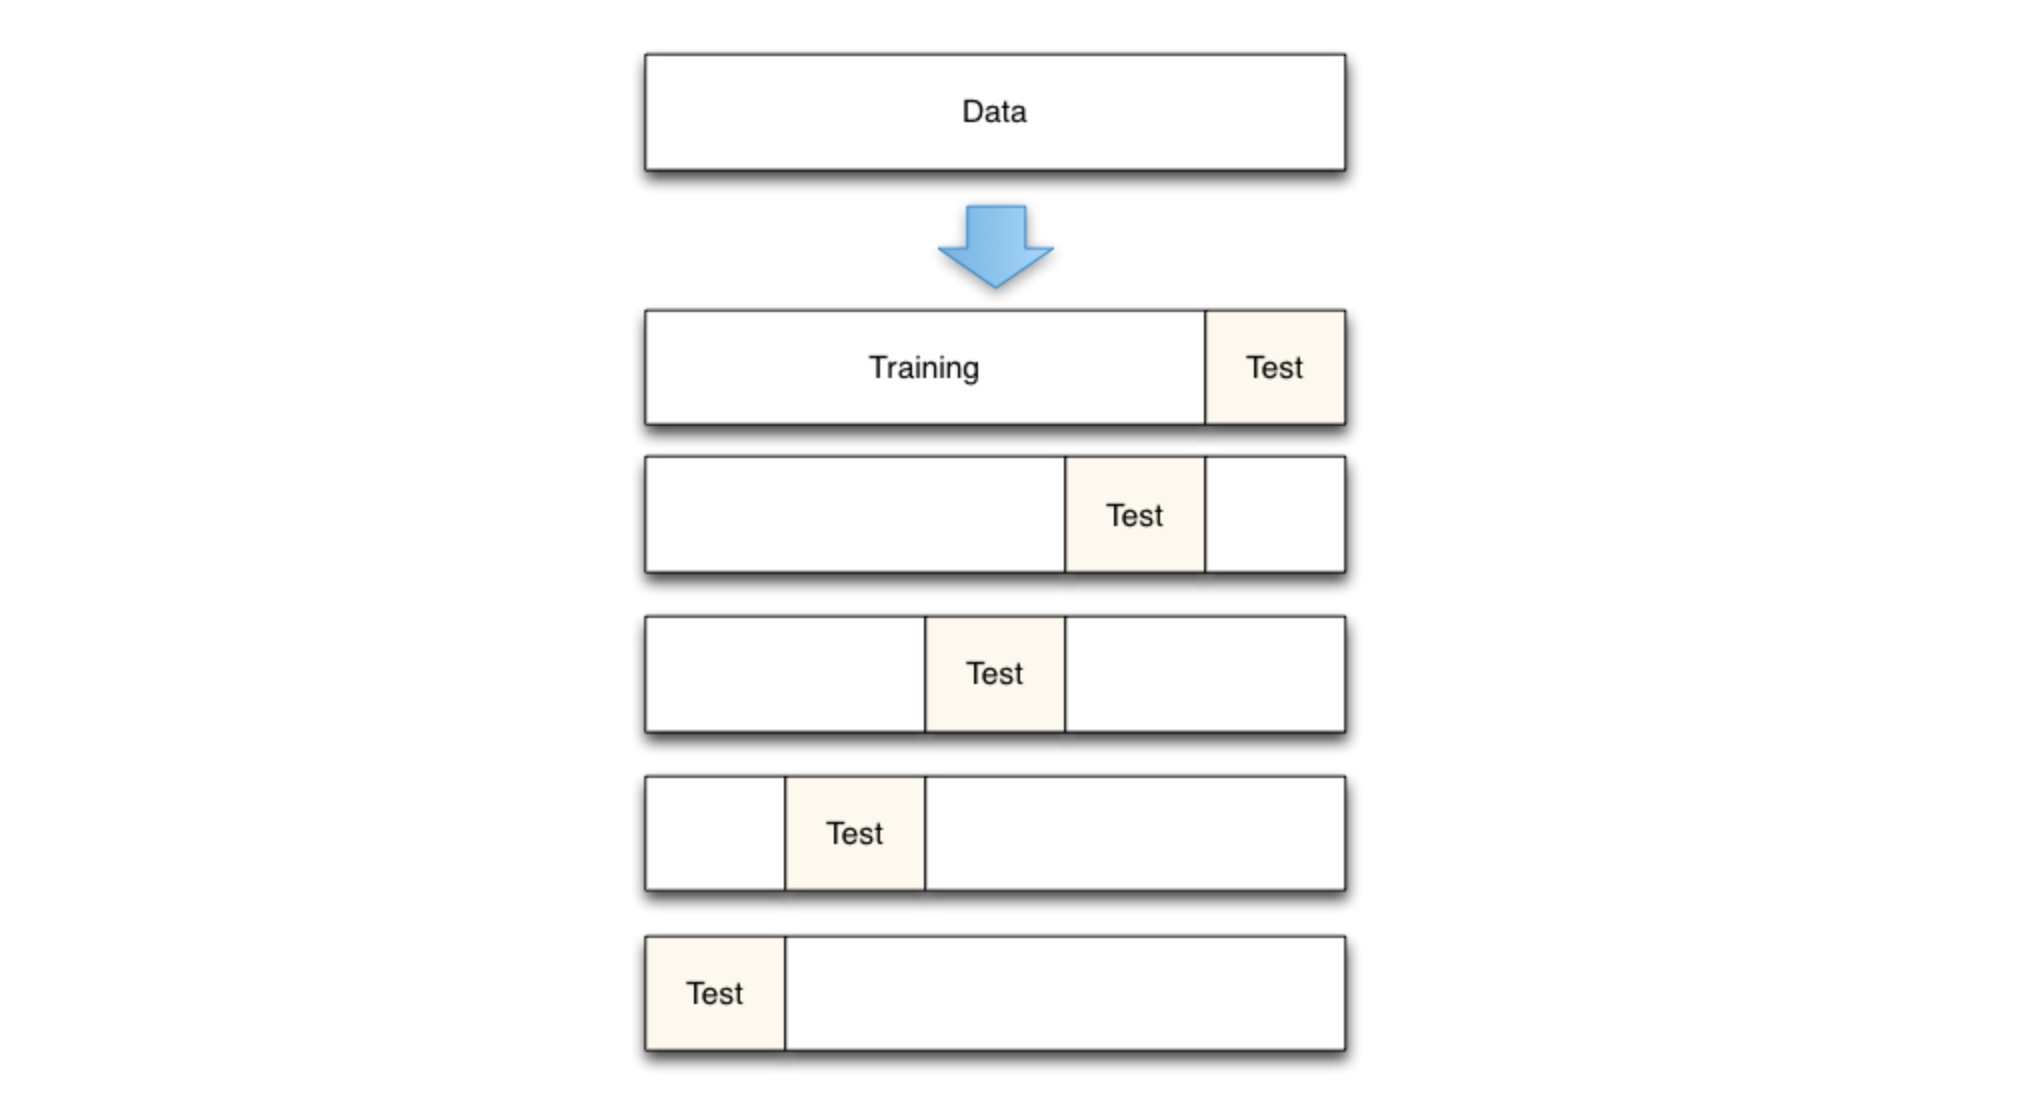


In [7]:
# simulate splitting a dataset of 25 observations into 5 folds
import numpy as np
from sklearn.model_selection import KFold
kf = KFold(n_splits=5, shuffle=False)
splits = kf.split(list(range(25)))
# print the contents of each training and testing set
print('{} {:^61} {}'.format('Iteration', 'Training set observations', 'Testing set observations'))
for iteration, data in enumerate(splits, start=1):
    print('{:^9} {} {:^25}'.format(iteration, format(str(np.array(data[0]))), format(str(np.array(data[1])))))

Iteration                   Training set observations                   Testing set observations
    1     [ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [0 1 2 3 4]       
    2     [ 0  1  2  3  4 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]        [5 6 7 8 9]       
    3     [ 0  1  2  3  4  5  6  7  8  9 15 16 17 18 19 20 21 22 23 24]     [10 11 12 13 14]     
    4     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 20 21 22 23 24]     [15 16 17 18 19]     
    5     [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]     [20 21 22 23 24]     


- Dataset contains **25 observations** (numbered 0 through 24)
- 5-fold cross-validation, thus it runs for **5 iterations**
- For each iteration, every observation is either in the training set or the testing set, **but not both**
- Every observation is in the testing set **exactly once**

## Comparing cross-validation to train/test split

Advantages of **cross-validation:**

- More accurate estimate of out-of-sample accuracy
- More "efficient" use of data (every observation is used for both training and testing)

Advantages of **train/test split:**

- Runs K times faster than K-fold cross-validation
- Simpler to examine the detailed results of the testing process

## Cross-validation recommendations

1. n (in n-fold cross validation) can be any number, but **n=10** is generally recommended
2. For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's `cross_val_score` function does this by default

## A limited example  of  cross-validation in use

This subsection shows `cross_val_score()` in action in a very limited way. The next section gives a full casestudy of how `cross_val_score()` could be use in practice.

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np
from sklearn.model_selection import cross_val_score

# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

## use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=4)

# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(f"The accuracy score for each fold is \n{scores}")

# use average accuracy as an estimate of out-of-sample accuracy
print(f"average accuracy over each fold as an estimate of out-of-sample accuracy is: {scores.mean()}")

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(f"The out of sample accuracy (held-out test sample) is: {metrics.accuracy_score(y_test, y_pred)}")


The accuracy score for each fold is 
[1.         0.91666667 1.         1.         1.         0.91666667
 1.         1.         1.         1.        ]
average accuracy over each fold as an estimate of out-of-sample accuracy is: 0.9833333333333332
The out of sample accuracy (held-out test sample) is: 0.9333333333333333


# Case Study: iris: KNN Review, crossfold validation 

Here we review KNN and also incorporate crossfold validation into the modeling pipeline to optimize hyperparamters (such as number of neighbors in the case of KNN).

## Section overview

- Exploring the KNN Algorithm
- What is the drawback of using the **train/test split** procedure for model evaluation?
- How does **K-fold cross-validation** overcome this limitation?
- How can cross-validation be used for selecting **tuning parameters**, choosing between **models**, and selecting **features**?
- What are some possible **improvements** to cross-validation?


## Review KNN with n=3 versus KNN with n=5 for iris dataset

In [36]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=.5, random_state=4)

# select sepal features only (for easier 2D visualization)
sepal_train = X_train[:,:2]
sepal_test = X_test[:,:2]

# generate predictions (based on 3 nearest neighbors)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(sepal_train, y_train)
preds3 = knn.predict(sepal_test)

# generate predictions (based on 5 nearest neighbors)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(sepal_train, y_train)
preds5 = knn.predict(sepal_test)

In [37]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [38]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

### Select the test examples that were predicted differently by each model

There are just **9 test cases** where the prediction the KNN with three neighbors disagrees with KNN with five neighbors. By examining these differences in prediction we get see some of the internals of KNN in action.

In [12]:
# select a few examples that were predicted differently by each model
class_change = np.where((preds3-preds5)!=0)
example_width = sepal_test[class_change][:,1]  
example_length = sepal_test[class_change][:,0]
test_cases = sepal_test[class_change][:,(0,1)] # 9 test cases
print(f"The are {len(class_change[0])} cases where the two KNN classifiers disagreed")
print(f"These predictions for each of these test cases were different   {class_change[0]}")
print(f"The inputs of the cases that were classified differently are:\n\n{test_cases}")

The are 9 cases where the two KNN classifiers disagreed
These predictions for each of these test cases were different   [11 18 19 20 28 30 39 42 49]
The inputs of the cases that were classified differently are:

[[6.9 3.1]
 [6.6 2.9]
 [6.5 3. ]
 [6.5 3. ]
 [6.2 2.2]
 [6.9 3.2]
 [6.  3.4]
 [6.  3. ]
 [6.2 3.4]]


### Plot the training data and a subset of the testdata (where predictions differed)
Plot all the training data and the subset of the testdata where predictions of the two KNN models differed (just 9 test cases). 


In [39]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline

# assign a color to each class
class_colors = {0:'purple', 1:'blue', 2:'green'}

# map colors to true class data 
true_colors = [class_colors[x] for x in y_train]
examples_true_color = [class_colors[x] for x in y_test[class_change]]
                  
# map colors to predicted classes (for knn=3 and knn=5)
preds3_examples = preds3[class_change]
preds3_example_colors = [class_colors[x] for x in preds3_examples]

preds5_examples = preds5[class_change]
preds5_example_colors = [class_colors[x] for x in preds5_examples]

# generate legend patches
setosa = mpatches.Patch(color='purple', label='Setosa')
versicolour = mpatches.Patch(color='green', label='Versicolour')
virginica = mpatches.Patch(color='blue', label='Virginica')

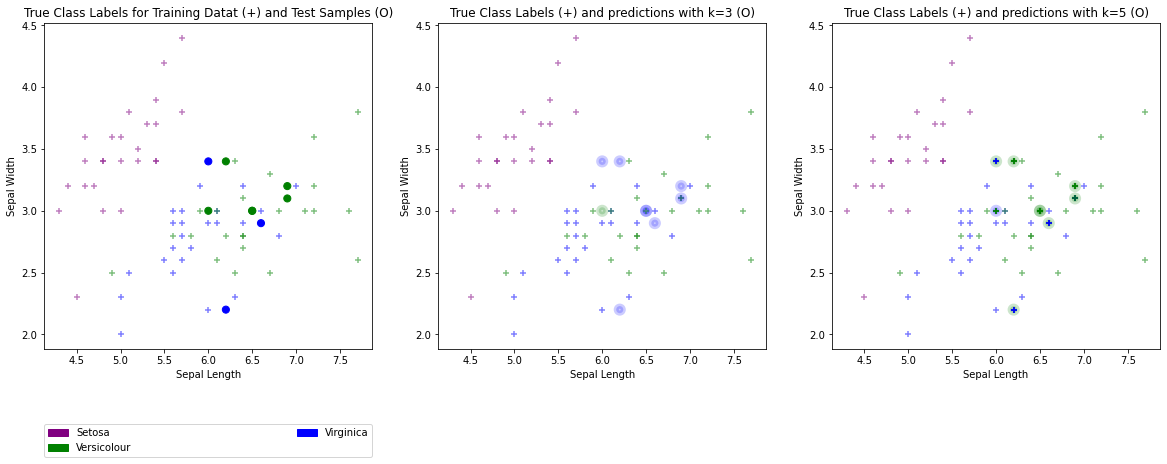

In [14]:
###### plot true class for all data
### Build 3 plots on a single row
fig, ax = plt.subplots(1,3,figsize=(20,6), sharex=True, sharey=True)

# first subplot (all training data) + 9 test cases where there was classifier disagreement
ax[0].scatter(sepal_train[:,0], sepal_train[:,1], c=true_colors, marker='+', alpha=.5)
ax[0].scatter(test_cases[:,0], test_cases[:,1], marker="o", s=50, c=examples_true_color)
ax[0].set_title('True Class Labels for Training Datat (+) and Test Samples (O)')
ax[0].set_xlabel('Sepal Length')
ax[0].set_ylabel('Sepal Width')
ax[0].legend(handles=[setosa, versicolour, virginica], bbox_to_anchor=(0, -.33, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0.)


# plot examples where test predictions differ
ax[1].scatter(test_cases[:,0], test_cases[:,1],  c=preds3_example_colors, marker="o", s=50, alpha =.2, linewidths = 5)
ax[2].scatter(test_cases[:,0], test_cases[:,1], c=examples_true_color, marker="+")
ax[1].scatter(sepal_train[:,0], sepal_train[:,1], c=true_colors, marker='+', alpha=.5)
ax[1].set_title('True Class Labels (+) and predictions with k=3 (O)')
ax[1].set_xlabel('Sepal Length')
ax[1].set_ylabel('Sepal Width')
ax[1].tick_params(labelleft=True)



ax[2].scatter(test_cases[:,0], test_cases[:,1],  c=preds5_example_colors, marker="o", s=50, alpha =.2, linewidths = 5)
ax[2].scatter(test_cases[:,0], test_cases[:,1], c=examples_true_color, marker="+")
ax[2].scatter(sepal_train[:,0], sepal_train[:,1], c=true_colors, marker='+', alpha=.5)
ax[2].set_title('True Class Labels (+) and predictions with k=5 (O)')
ax[2].set_xlabel('Sepal Length')
ax[2].set_ylabel('Sepal Width')
ax[2].tick_params(labelleft=True);

Notice how the test cases (dots in the middle and right plots are flipped by the two KNN classifiers.


### Examine the Iris data for two KNN classifers (k=3 and k=5)

In [40]:
# calculate euclidean distance
def metric_func(x1, x2):
    distance = np.linalg.norm(x1 - x2, ord=2, axis=1)
    return distance

examples = sepal_test[class_change]
nearest_indices = np.zeros(shape=(examples.shape[0], 5), dtype=np.int) - 1
nearest_distances = np.zeros(shape=(examples.shape[0], 5), dtype=np.float) - 1

# collect index and distance for 5 nearest neighbors
for i in range(examples.shape[0]):
    distances = metric_func(examples[i], sepal_train)
    index_order = np.argsort(distances)[:5]
    nearest_indices[i] = index_order
    nearest_distances[i] = distances[index_order]
    

In [41]:
import pandas as pd
pd.set_option('display.max_colwidth',100)
df = pd.DataFrame(columns=["Test Sample", "Nearest Points", "Euclidean Distance", 
                           "Class(es)", "Pred k=3", "Pred k=5" ])

for i in range(len(examples)):
    df.loc[i] = [examples[i], sepal_train[nearest_indices[i]], np.round(nearest_distances[i],3), 
                 y_train[nearest_indices[i]], 
                 np.argmax(np.bincount(y_train[nearest_indices[i, :3]])), #k = 3
                 np.argmax(np.bincount(y_train[nearest_indices[i, :5]]))  #k =5  
                ]

/usr/local/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


### Examine data for test Samples
|Column Name   | Description|
|:--|:---|
|Test Data| Sample points (sepal width, sepal length) taken from the held-out test data |
|Nearest Points| Five nearest points (by Euclidean distance) from the data used to train the model |
|Euclidean Distance| Distance from the test sample to each of the five nearest points|
|Class(es)| True class(es) of the five nearest points|
|Pred k=3 | Predicted class for the test sample when k=3 |
|Pred k=5|  Predicted class for the test sample when k=5 |


In [17]:
df

,Test Sample,Nearest Points,Euclidean Distance,Class(es),Pred k=3,Pred k=5
0,"[6.9, 3.1]","[[6.9, 3.1], [6.9, 3.1], [7.0, 3.2], [6.8, 3.0], [7.1, 3.0]]","[0.0, 0.0, 0.141, 0.141, 0.224]","[1, 2, 1, 2, 2]",1,2
1,"[6.6, 2.9]","[[6.6, 3.0], [6.5, 3.0], [6.4, 2.9], [6.4, 2.8], [6.4, 2.8]]","[0.1, 0.141, 0.2, 0.224, 0.224]","[1, 2, 1, 2, 2]",1,2
2,"[6.5, 3.0]","[[6.5, 3.0], [6.6, 3.0], [6.4, 3.1], [6.4, 2.9], [6.4, 3.2]]","[0.0, 0.1, 0.141, 0.141, 0.224]","[2, 1, 2, 1, 1]",2,1
3,"[6.5, 3.0]","[[6.5, 3.0], [6.6, 3.0], [6.4, 3.1], [6.4, 2.9], [6.4, 3.2]]","[0.0, 0.1, 0.141, 0.141, 0.224]","[2, 1, 2, 1, 1]",2,1
4,"[6.2, 2.2]","[[6.3, 2.3], [6.0, 2.2], [6.3, 2.5], [6.1, 2.6], [6.4, 2.7]]","[0.141, 0.2, 0.316, 0.412, 0.539]","[1, 1, 2, 2, 2]",1,2
5,"[6.9, 3.2]","[[7.0, 3.2], [6.9, 3.1], [6.9, 3.1], [6.7, 3.3], [6.8, 3.0]]","[0.1, 0.1, 0.1, 0.224, 0.224]","[1, 1, 2, 2, 2]",1,2
6,"[6.0, 3.4]","[[5.9, 3.2], [6.3, 3.4], [6.1, 3.0], [6.1, 3.0], [5.9, 3.0]]","[0.224, 0.3, 0.412, 0.412, 0.412]","[1, 2, 2, 1, 2]",2,2
7,"[6.0, 3.0]","[[6.1, 3.0], [6.1, 3.0], [5.9, 3.0], [6.0, 2.9], [6.1, 2.9]]","[0.1, 0.1, 0.1, 0.1, 0.141]","[1, 2, 2, 1, 1]",2,1
8,"[6.2, 3.4]","[[6.3, 3.4], [6.4, 3.2], [5.9, 3.2], [6.4, 3.1], [6.1, 3.0]]","[0.1, 0.283, 0.361, 0.361, 0.412]","[2, 1, 1, 2, 1]",1,1


## Which model? HiPPO versus CrossValidation: 

**Motivation:** We need an objective way to choose between different machine learning models 

- Goal is to estimate likely performance of a model on **out-of-sample data**

**Initial idea:** HiPP0 (highest paid person's opinion
* bad idea!

**Another idea:** Train and test on the same data

- But, maximizing **training accuracy** rewards overly complex models which **overfit** the training data
- This is a BAD idead

**Alternative idea:** Train/test split

- Split the dataset into two pieces, so that the model can be trained and tested on **different data**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance
- But, it provides a **high variance** estimate since changing which observations happen to be in the testing set can significantly change testing accuracy

In [18]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

## use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=4)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9333333333333333


**Question:** What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?

**Answer:** That's the essense of cross-validation!

## Cross-validation example: parameter tuning

**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset.

Note: `cross_val_score` uses (Stratified)KFold sampling when the target variable is categorical.


In [19]:
from sklearn.model_selection import cross_val_score
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
print(f"The accuracy score for each fold is \n{scores}")

The accuracy score for each fold is 
[1.         0.91666667 1.         1.         1.         0.91666667
 1.         1.         1.         1.        ]


In [20]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.9833333333333332


In [21]:
# search for an optimal value of nn for KNN
nn_range = list(range(1, 31))
mean_accuracy_for_each_knn = []
for k in nn_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    mean_accuracy_for_each_knn.append([k, scores.mean()])
cf_results = pd.DataFrame(mean_accuracy_for_each_knn, 
                     columns=["nn", "mean_accuracy_for_each_knn" ])
display(cf_results)

,nn,mean_accuracy_for_each_knn
0,1,0.960000
1,2,0.953333
2,3,0.966667
3,4,0.966667
4,5,0.966667
5,6,0.966667
6,7,0.966667
7,8,0.966667
8,9,0.973333
9,10,0.966667


In [22]:
import numpy as np
print(list(cf_results.iloc[np.argmax(cf_results.mean_accuracy_for_each_knn)]))
print(f"The best NN is (it is a tie but NN=13 is the earliest in the list): {list(cf_results.iloc[np.argmax(cf_results.mean_accuracy_for_each_knn)])[0]}")

[13.0, 0.9800000000000001]
The best NN is (it is a tie but NN=13 is the earliest in the list): 13.0


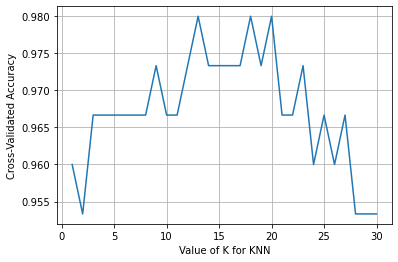

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
k_range = range(1, 31)

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, cf_results.mean_accuracy_for_each_knn)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()

## KNN versus logistic regression: let crossfold validation decide!

**Goal:** Compare the best KNN model with linear classifier the logistic regression model on the iris dataset

In [30]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=13)
print(cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy').mean())

0.975


In [31]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X_train, y_train, cv=10, scoring='accuracy').mean())

0.9666666666666666


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


# `GridSearchCV`: hyperparameter tuning at scale (iris)

Instead of managing experiments ourselves via code like this:

        # search for an optimal value of K for KNN
        k_range = list(range(1, 31))
        k_scores = []
        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
            k_scores.append(scores.mean())
        print(k_scores)

If we have 3 hyperparamters to tune then we will need potentially **three (3) ** for loops. Or 
we can use `GridSearchCV()` class. For example, the following code simpifies the exploration/tuning of one or more hyperparamters using `GridSearchCV()`

        
        #define the parameter values that should be searched
        k_range = list(range(1, 31))
        #create a parameter grid: map the parameter names to the values that should be searched
        param_grid = dict(n_neighbors=k_range)  
        grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy') # instantiate the grid
        grid.fit(X, y) # fit the grid with data



## GridsearchCV for KNN Hyperparameter  optimization

In [32]:
from sklearn.model_selection import GridSearchCV
# define the parameter values that should be searched
nn_range = list(range(1, 31))
print(f"nn_range: {k_range}")
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=nn_range)
print(f"param_grid = {param_grid}\n")


nn_range: range(1, 31)
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}



In [33]:
# create an instance  GridSearchCV class
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)

* You can set **`n_jobs = -1`** to run computations in parallel (if supported by your computer and OS). These days most laptop have 4-6 CPUs plus cores. Make sure Docker's setting have been set to use a 2-4 cores.

### fit the grid with data

In [35]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np# read in the iris data
from sklearn.model_selection import GridSearchCV
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

## use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=4)

grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(n_neighbors=13),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             scoring='accuracy')

### Let's put it all together

In [26]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np# read in the iris data
from sklearn.model_selection import GridSearchCV
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

## use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=4)
knn = KNeighborsClassifier()

# define the parameter values that should be searched
nn_range = list(range(1, 31))
print(f"nn_range: {k_range}")
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=nn_range)
print(f"param_grid = {param_grid}\n")

# create an instance  GridSearchCV class
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)

nn_range: range(1, 31)
param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}



GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

### View the complete results (list of named tuples)

In [27]:
# view the complete results (list of named tuples)
grid.cv_results_

{'mean_fit_time': array([0.00044303, 0.0004483 , 0.00040381, 0.0004324 , 0.00045998,
        0.00051701, 0.00045683, 0.00040691, 0.00042639, 0.00050662,
        0.00041339, 0.00042496, 0.00041943, 0.00041785, 0.00047684,
        0.00045445, 0.00043383, 0.00041988, 0.00041773, 0.0003906 ,
        0.00041149, 0.00041742, 0.00048552, 0.0005374 , 0.00051155,
        0.00057437, 0.00055907, 0.0004657 , 0.00055494, 0.0005177 ]),
 'std_fit_time': array([1.04244924e-04, 8.53865477e-05, 3.47403032e-05, 7.25374333e-05,
        4.59345491e-05, 4.59604301e-05, 2.77978989e-05, 3.69241110e-05,
        6.85031969e-05, 1.88332250e-04, 6.88205419e-05, 3.35383340e-05,
        4.99892525e-05, 4.18949952e-05, 5.72851927e-05, 6.05223062e-05,
        5.42545771e-05, 8.58257511e-05, 8.32454063e-05, 2.45624486e-05,
        7.08623536e-05, 4.83618204e-05, 1.29702608e-04, 1.32327982e-04,
        4.90016248e-05, 1.32116357e-04, 9.92679712e-05, 4.63962861e-05,
        1.99215728e-04, 1.07770641e-04]),
 'mean_scor

### View the complete results as a DataFrame

Each column corresponds to single experiment and each row corresponds to a facet of each experiment such as `mean_test_score`.

In [28]:
results = pd.DataFrame(grid.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
mean_fit_time,0.000443029,0.000448298,0.00040381,0.000432396,0.000459981,0.000517011,0.000456834,0.000406909,0.000426388,0.000506616,...,0.000411487,0.000417423,0.000485516,0.000537395,0.000511551,0.000574374,0.000559068,0.000465703,0.000554943,0.000517702
std_fit_time,0.000104245,8.53865e-05,3.47403e-05,7.25374e-05,4.59345e-05,4.59604e-05,2.77979e-05,3.69241e-05,6.85032e-05,0.000188332,...,7.08624e-05,4.83618e-05,0.000129703,0.000132328,4.90016e-05,0.000132116,9.9268e-05,4.63963e-05,0.000199216,0.000107771
mean_score_time,0.00119891,0.001209,0.00115612,0.00121114,0.00133557,0.00147378,0.0012934,0.00120194,0.0012018,0.00129738,...,0.00117576,0.00120564,0.00123813,0.00141602,0.00183632,0.00163493,0.00157135,0.00147512,0.00156634,0.00138607
std_score_time,0.000173444,9.36781e-05,0.000112016,0.000155054,8.43725e-05,0.000198797,0.000122469,0.00011725,0.000144138,0.000211376,...,0.00010133,7.83807e-05,0.000102809,0.000256318,0.000425391,0.000327306,0.000141585,0.000237134,0.000300344,0.00019043
param_n_neighbors,1,2,3,4,5,6,7,8,9,10,...,21,22,23,24,25,26,27,28,29,30
params,{'n_neighbors': 1},{'n_neighbors': 2},{'n_neighbors': 3},{'n_neighbors': 4},{'n_neighbors': 5},{'n_neighbors': 6},{'n_neighbors': 7},{'n_neighbors': 8},{'n_neighbors': 9},{'n_neighbors': 10},...,{'n_neighbors': 21},{'n_neighbors': 22},{'n_neighbors': 23},{'n_neighbors': 24},{'n_neighbors': 25},{'n_neighbors': 26},{'n_neighbors': 27},{'n_neighbors': 28},{'n_neighbors': 29},{'n_neighbors': 30}
split0_test_score,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
split1_test_score,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,...,0.916667,0.916667,0.833333,0.916667,0.833333,0.916667,0.916667,0.916667,0.916667,0.916667
split2_test_score,0.916667,0.833333,1,1,1,1,1,1,1,1,...,0.916667,0.916667,0.916667,1,0.916667,0.833333,0.833333,0.833333,0.833333,0.833333
split3_test_score,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,0.916667,1,1,1,1


### examine the `mean_test_score` vector of results

`mean_test_score` corresponds to mean accuracy score on each of the folds for each experimental setup.

In [29]:
### examine the first tuple

print(grid.cv_results_['mean_test_score'])

[0.95833333 0.95833333 0.975      0.98333333 0.98333333 0.98333333
 0.98333333 0.96666667 0.975      0.975      0.98333333 0.975
 0.975      0.95833333 0.96666667 0.95833333 0.95833333 0.95833333
 0.95833333 0.94166667 0.96666667 0.96666667 0.95833333 0.96666667
 0.95       0.94166667 0.95       0.94166667 0.94166667 0.94166667]


Text(0.5, 1.0, 'Accuracy for KNN models with different numbers of nearest neighbors')

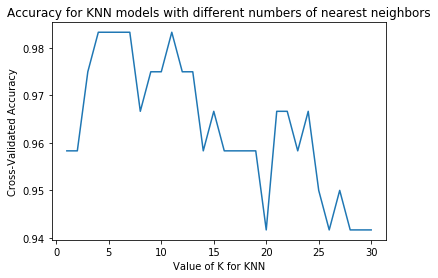

In [30]:
# plot the results

plt.plot(k_range, grid.cv_results_['mean_test_score'])
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('Accuracy for KNN models with different numbers of nearest neighbors')

In [31]:
# examine the best model
print(f"The best model is :\n{grid.best_estimator_}")
print(f"The best hyperparameters are: {grid.best_params_}\n")
print(f"The accuracy of the best found model is :{grid.best_score_}")


The best model is :
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
The best hyperparameters are: {'n_neighbors': 4}

The accuracy of the best found model is :0.9833333333333332


## Searching multiple parameters simultaneously

- **Example:** tuning `max_depth` and `min_samples_leaf` for a `DecisionTreeClassifier`
- Could tune parameters **independently**: change `max_depth` while leaving `min_samples_leaf` at its default value, and vice versa
- But, best performance might be achieved when **neither parameter** is at its default value

In [32]:
# define the parameter values that should be searched
nn_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=nn_range, 
                  weights=weight_options)
print(param_grid)

{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}


In [33]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np# read in the iris data
from sklearn.model_selection import GridSearchCV
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

## use train/test split with different random_state values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=4)

# define the parameter values that should be searched
nn_range = list(range(1, 31))
weight_options = ['uniform', 'distance']
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(n_neighbors=nn_range, 
                  weights=weight_options)
print(f"param_grid = {param_grid}\n")

# create an instance  GridSearchCV class
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy', return_train_score=False)
grid.fit(X_train, y_train)

param_grid = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']}



GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [34]:
results = pd.DataFrame(grid.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
mean_fit_time,0.000583434,0.00063343,0.00068326,0.000554276,0.000533867,0.000468135,0.000449729,0.000447297,0.00049994,0.000488925,...,0.000347638,0.000362349,0.000399423,0.00040319,0.000419545,0.000471258,0.00044806,0.000472665,0.000483131,0.000591016
std_fit_time,0.00011963,0.000213602,0.000146379,0.000205401,0.000228583,5.20444e-05,5.6633e-05,0.000107315,0.000107798,0.000118959,...,4.21116e-05,2.88285e-05,6.48946e-05,4.77501e-05,3.52182e-05,0.000115476,5.17668e-05,0.00014807,8.18598e-05,0.000131999
mean_score_time,0.00167623,0.00120275,0.00189147,0.00110037,0.00146277,0.000910497,0.00127916,0.000982881,0.00135527,0.00101304,...,0.00106146,0.000794315,0.0011539,0.000861669,0.00127888,0.000931573,0.00137591,0.000943661,0.00167689,0.00132766
std_score_time,0.000362274,0.000392774,0.00026286,0.000220901,0.000216754,9.10702e-05,0.000191971,0.000355304,0.000215901,0.000280943,...,9.13343e-05,0.000103659,7.00167e-05,9.86704e-05,0.000135483,0.000173106,9.63894e-05,0.000116281,0.000706707,0.000489643
param_n_neighbors,1,1,2,2,3,3,4,4,5,5,...,26,26,27,27,28,28,29,29,30,30
param_weights,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance,...,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance
params,"{'n_neighbors': 1, 'weights': 'uniform'}","{'n_neighbors': 1, 'weights': 'distance'}","{'n_neighbors': 2, 'weights': 'uniform'}","{'n_neighbors': 2, 'weights': 'distance'}","{'n_neighbors': 3, 'weights': 'uniform'}","{'n_neighbors': 3, 'weights': 'distance'}","{'n_neighbors': 4, 'weights': 'uniform'}","{'n_neighbors': 4, 'weights': 'distance'}","{'n_neighbors': 5, 'weights': 'uniform'}","{'n_neighbors': 5, 'weights': 'distance'}",...,"{'n_neighbors': 26, 'weights': 'uniform'}","{'n_neighbors': 26, 'weights': 'distance'}","{'n_neighbors': 27, 'weights': 'uniform'}","{'n_neighbors': 27, 'weights': 'distance'}","{'n_neighbors': 28, 'weights': 'uniform'}","{'n_neighbors': 28, 'weights': 'distance'}","{'n_neighbors': 29, 'weights': 'uniform'}","{'n_neighbors': 29, 'weights': 'distance'}","{'n_neighbors': 30, 'weights': 'uniform'}","{'n_neighbors': 30, 'weights': 'distance'}"
split0_test_score,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
split1_test_score,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,...,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667,0.916667
split2_test_score,0.916667,0.916667,0.833333,0.916667,1,1,1,1,1,1,...,0.833333,0.916667,0.833333,1,0.833333,0.833333,0.833333,0.916667,0.833333,0.833333


In [35]:
# view the complete results
grid.cv_results_['mean_test_score']

array([0.95833333, 0.95833333, 0.95833333, 0.95833333, 0.975     ,
       0.975     , 0.98333333, 0.975     , 0.98333333, 0.98333333,
       0.98333333, 0.98333333, 0.98333333, 0.98333333, 0.96666667,
       0.98333333, 0.975     , 0.98333333, 0.975     , 0.975     ,
       0.98333333, 0.98333333, 0.975     , 0.975     , 0.975     ,
       0.98333333, 0.95833333, 0.975     , 0.96666667, 0.975     ,
       0.95833333, 0.96666667, 0.95833333, 0.96666667, 0.95833333,
       0.96666667, 0.95833333, 0.96666667, 0.94166667, 0.96666667,
       0.96666667, 0.96666667, 0.96666667, 0.96666667, 0.95833333,
       0.975     , 0.96666667, 0.975     , 0.95      , 0.975     ,
       0.94166667, 0.96666667, 0.95      , 0.96666667, 0.94166667,
       0.95833333, 0.94166667, 0.96666667, 0.94166667, 0.95833333])

In [36]:
# examine the best model
print(f"The best model is :\n{grid.best_estimator_}")
print(f"The best hyperparameters are: {grid.best_params_}\n")
print(f"The accuracy of the best found model is :{grid.best_score_}")


The best model is :
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')
The best hyperparameters are: {'n_neighbors': 4, 'weights': 'uniform'}

The accuracy of the best found model is :0.9833333333333332


## Using the best parameters to make predictions: 2 Approaches

### First approach: rebuild a model with the best hyperparameters on all the training data

In [37]:
# train your model using all data and the best known parameters
knn = KNeighborsClassifier(n_neighbors=4, weights='uniform')
knn.fit(X, y)

# make a prediction on out-of-sample data
predicted_class_id = knn.predict([[3, 5, 4, 2]])
# The predicted class is the 1-class
print (f"The predicted class is : {iris.target_names[predicted_class_id[0]]}")
# The predicted class is the 1-class

The predicted class is : versicolor


### Second approach: use model that was returned as part of the GridSearchCV
One of the final steps  in GridSearchCV is to fit a model with the best hyperparameters using all the training data. One can access this model directly. E.g., `grid.predict([[3, 5, 4, 2]])`

In [38]:
# shortcut: GridSearchCV automatically refits the best model using all of the data
predicted_class_id = grid.predict([[3, 5, 4, 2]])
# The predicted class is the 1-class
print (f"The predicted class is : {iris.target_names[predicted_class_id[0]]}")

The predicted class is : versicolor


#  Casestudy: ML workflow from CV to GridSearch: Pima Diabetes

We will apply the techniques discussed above to the Pima Indians Diabetes dataset.  The dataset contains various diagnostic measurements for women of Pima Indiana heritage.  Our goal is to determine whether each woman has diabetes or not based on the available medical information.


| Attribute | Value |
|------------|------|
|Pima Indians dataset | The data can be found in the "datasets" folder inside the Lab02 folder |
|Problem description| Determine whether an individual has diabetes based on available medical data|
|Data engineering | Split the data and generate splits for cross-fold validation|
|Feature engineering | Standardize the numerical data
|Approaches to be explored| Explore KNN for classification, identify best hyperparameters|
|Generate predictions | Evaluate the best model using test data|


## Load the data

In [39]:
import pandas as pd
import numpy as np

pima = pd.read_csv('datasets/Pima-Diabetes/diabetes.csv')

## Understand the data (e.g., review data dictionary, EDA "light")

### Review a data dictionary (when available)

The data available to us includes: 

|Feature|Meaning|
---------|---------
Pregnancies|Number of times pregnant
Glucose|Plasma glucose concentration
BloodPressure|Diastolic blood pressure (mm Hg)
SkinThickness|Triceps skin fold thickness (mm)
Insulin|2-Hour serum insulin (mu U/ml)
BMI|Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction|Calculation based on diabetes history in relatives
Age|Age (years)

The `'outcome'` feature is our target classification variable denoting whether a person has diabetes (Class 1) or not (Class 0).

### Explore counts, datatypes, NaN values, and basic descriptive statistics

In [40]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [41]:
pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
pima.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Visualize extent of correlation between features

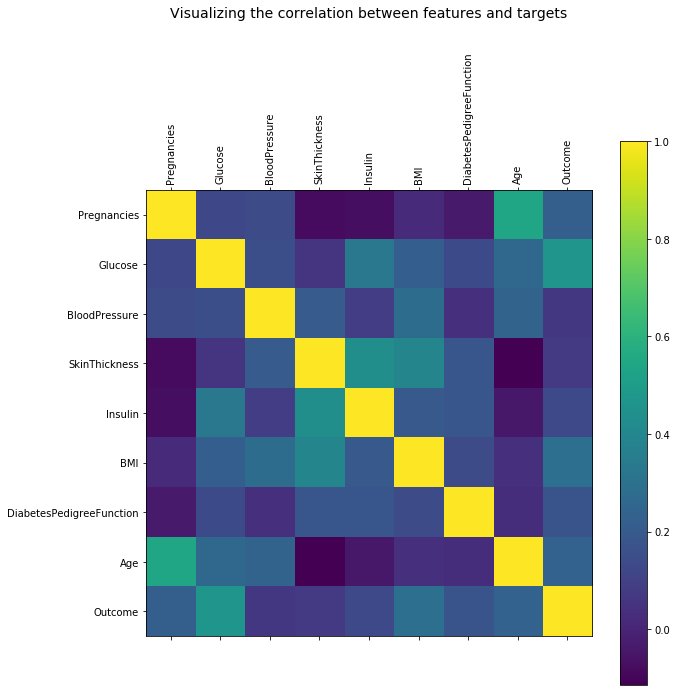

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
ms = ax.matshow(pima.corr())
fig.colorbar(ms)
label_count = list(range(len(pima.columns)))
ax.set_xticks(label_count)
ax.set_xticklabels(pima.columns, rotation=90)
ax.set_yticks(label_count)
ax.set_yticklabels(pima.columns)
ax.set_title('Visualizing the correlation between features and targets', pad=150, fontsize=14);

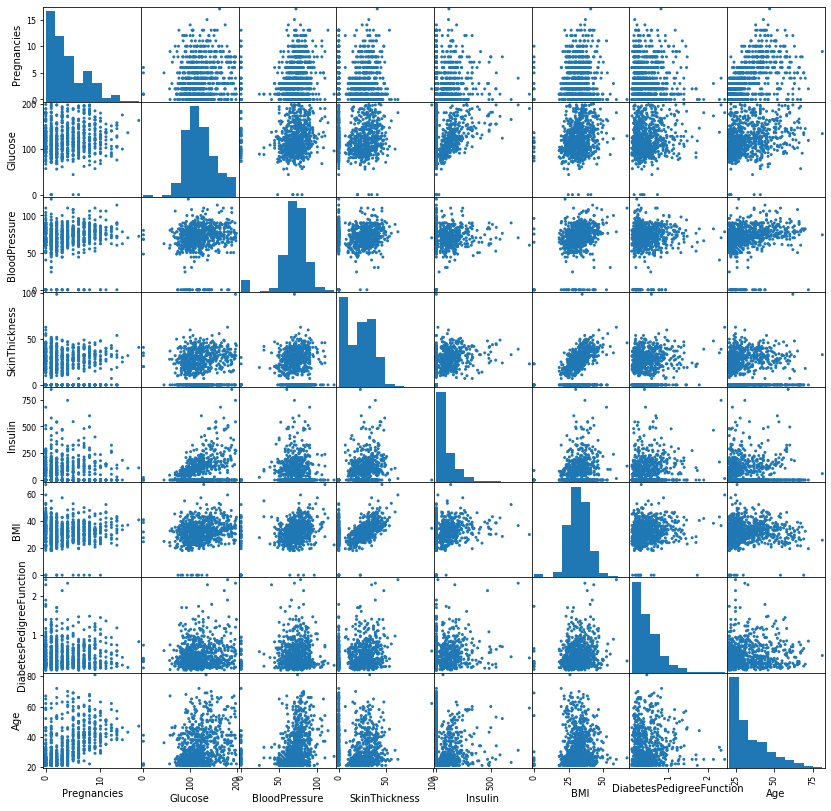

In [44]:
pd.plotting.scatter_matrix(pima.iloc[:,:-1], alpha=1, figsize=(14,14));

## Data engineering (e.g., split data)

### Assign feature values to X and targets to y

In [45]:
X = pima.iloc[:,:-1]
y = pima.iloc[:,-1]

### Separate data into training set and and hold-out test set

In [46]:
from sklearn.model_selection import train_test_split
# note X is a pandas dataframe here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

In [47]:
print('X_train:', len(X_train), '\ty_train:', len(y_train), '\tClass 1 Proportion:',round(np.mean(y_train),3))
print('X_test:', len(X_test), '\ty_test:', len(y_test), '\tClass 1 Proportion:',round(np.mean(y_test),3))

X_train: 614 	y_train: 614 	Class 1 Proportion: 0.349
X_test: 154 	y_test: 154 	Class 1 Proportion: 0.351


### Generate splits for training data

In [48]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

## Feature engineering (e.g., standardize features)
Use StandardScaler to center data around mean of 0 and standard deviation of 1.

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [50]:
# first five samples before scaling
print(X_train.values[0:5])

[[  1.     90.     62.     12.     43.     27.2     0.58   24.   ]
 [  5.    126.     78.     27.     22.     29.6     0.439  40.   ]
 [  2.    105.     58.     40.     94.     34.9     0.225  25.   ]
 [  1.    146.     56.      0.      0.     29.7     0.564  29.   ]
 [  0.     95.     64.     39.    105.     44.6     0.366  22.   ]]


In [51]:
# first five samples after scaling
print(X_train_scaled[0:5])

[[-0.85135507 -0.98013068 -0.40478372 -0.55397256 -0.33131928 -0.60767846
   0.31079384 -0.79216928]
 [ 0.35657564  0.16144422  0.46536842  0.392787   -0.52639809 -0.30213902
  -0.11643851  0.56103382]
 [-0.5493724  -0.50447447 -0.62232176  1.21331196  0.14244354  0.3725939
  -0.76486207 -0.70759409]
 [-0.85135507  0.7956525  -0.73109078 -1.31138021 -0.73076636 -0.28940821
   0.26231357 -0.36929331]
 [-1.15333775 -0.82157861 -0.29601471  1.15019465  0.24462767  1.60748245
  -0.33762972 -0.96131967]]


## Leakage: cross_val_score with StandardScaler as first step

Data leakage refers to a mistake made by the creator of a machine learning model in which they accidentally share information between the held-out test and training data-sets. Typically, when splitting a data-set into testing and training sets, the goal is to ensure that no data is shared between the two. This is because the test set’s purpose is to simulate real-world, using the held-out unseen data. However, when evaluating a model, we do have full access to both our train and test sets, so it is up to us to ensure that no data in the training set is present in the test set.
Data leakage often results in unrealistically-high levels of performance on the test set, because the model is being ran on data that it had already seen — in some capacity — in the training set. The model effectively memorizes the training set data, and is easily able to correctly output the labels/values for those test data-set examples. Clearly, this is not ideal, as it misleads the person evaluating the model. When such a model is then used on truly unseen data, performance will be much lower than expected.

There are lots examples of data leakage. It is important to avoid these situations when training models of your own. In general, you should avoid doing anything to your training set that involves having knowledge of the test set (test set proxies which we use in crossfold validation).

### Leakage via Pre-processing
A very common error that people make is to leak information in the data pre-processing step of machine learning. It is essential that these transformations only have knowledge of the training set, even though these these fitted transformation are applied to the test set as well.

For example, if you decide that you want to run `standardization` as a pre-processing step, you should fit your standardization transformation step on only the training folds (and not all the folds in when doing crossfold validation). Then, to apply it to your test set fold, you would only call its `transform()` method (in the case of a scikit-learn model) on the test fold. If, instead, you fit your pre-processor on the entire training data-set, you will leak information from the test fold, since the parameters of the pre-processing model will be fitted with knowledge of the test fold.


### Leakage via feature selection (covered in a later lecture
The impact of leaking information in the cross-validation varies depending on the
nature of the preprocessing step. Estimating the scale of the data using the test fold
usually doesn’t have a terrible impact, while using the test fold in feature extraction
and feature selection can lead to substantial differences in outcomes.

### Leakage example with Pima-Diabetes and CV

The following cell is an example of LEAKAGE in action as we standardized the entire training dataset and   then do crossfold validation on the preprocessed dataset (leaking scale information betweem training and test folds). As a result the out of sample accuracy estimate that we get via crossfold validation is much higher than the true test accuracy on the heldout test set.


In [52]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

pima = pd.read_csv('datasets/Pima-Diabetes/diabetes.csv')
X = pima.iloc[:,:-1]
y = pima.iloc[:,-1]
# note X is a pandas dataframe here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5) 
start = time.time()
# LEAKAGE in action as we standardized the entire training dataset and 
# and then crossfold validation on the preprocessed dataset
# HUGE BUG!!!!!!!!!!
knn_cv = cross_val_score(knn, X_train_scaled, y_train, cv=10)
cv_test_accuracy_proxy = knn_cv.mean()
duration = time.time()-start

knn = KNeighborsClassifier() # use default settings
knn.fit(X_train_scaled, y_train)

# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)
out_of_sample_test_acc = metrics.accuracy_score(y_test, y_pred)


results = pd.DataFrame(columns = ['Model', 'cv_test_accuracy_proxy with LEAKAGE', "out_of_sample_test_acc", 'Run Time (ms)'])
results.loc[len(results)] = ['KNN (default)', cv_test_accuracy_proxy, out_of_sample_test_acc, round(duration*1000, 3)]
results

,Model,cv_test_accuracy_proxy with LEAKAGE,out_of_sample_test_acc,Run Time (ms)
0,KNN (default),0.731174,0.701299,61.309


## Overcoming preprocessing leakage using pipelines with  CV 

The next section shows how to overcome preprocessing leakage using pipelines, a machine learning workflow tool implemented in SKLearn. 

# Pipelines:  managing machine learning workflows

In Python scikit-learn, Pipelines can help to define and automate workflows. In this section, we will rework the step-by-step workflow above using Pipelines in sci-kit learn, and you will discover how you can automate a common machine learning workflow.

## Reading Material

For more background on pipelines in Python, please  read the first 6 pages of Chapter 6 (Pages 305-311) of the Muller and Guido book.

## Pipeline Example: Data Preparation and Modeling

An easy trap to fall into in applied machine learning is leaking data from your training dataset to your test dataset especially when doing gridsearch and  crossfold validation.

To avoid this trap you need a robust test harness with strong separation of training and testing. This includes data preparation.

Data preparation is one easy way to leak knowledge of the whole training dataset to the algorithm. For example, preparing your data using normalization or standardization on the entire training dataset before learning would not be a valid test because the training dataset would have been influenced by the scale of the data in the test set.

Pipelines help you prevent data leakage in your test harness by ensuring that data preparation like standardization is constrained to each fold of your cross validation procedure.

The example below demonstrates this important data preparation and model evaluation workflow. The pipeline is defined with two steps:

1. Standardize the data.
* Use grid search to identify a best model using cross-fold validation.

## Building Pipelines
Let’s look at how we can use the Pipeline class to express the workflow for training
an SVM after scaling the data with MinMaxScaler (for now without the grid search).
First, we build a pipeline object by providing it with a list of steps. Each step is a tuple
containing a name (any string of your choosing1) and an instance of an estimator:

```python 
from sklearn.pipeline import Pipeline
pipe = Pipeline([("scaler", MinMaxScaler()), ("knn", KNeighborsClassifier())])
```
Here, we created two steps: the first, called "scaler", is an instance of MinMaxScaler,
and the second, called "knn", is an instance of KNN. Now, we can fit the pipeline, like
any other scikit-learn estimator:

```python 
pipe.fit(X_train, y_train)
```
Here, `pipe.fit()` first calls fit on the first step (the scaler), then transforms the training
data using the scaler, and finally fits the KNN with the scaled data. To evaluate on
the test data, we simply call pipe.score:

```python 
print("Test score: {:.2f}".format(pipe.score(X_test, y_test)))

Test score: 0.95
```

Calling the score method on the pipeline first transforms the test data using the
scaler, and then calls the score method on the KNN using the scaled test data. As you
can see, the result is identical to the one we got from the code at the beginning of the
chapter, when doing the transformations by hand. Using the pipeline, we reduced the
code needed for our “preprocessing + classification” process. The main benefit of
using the pipeline, however, is that we can now use this single estimator in
`cross_val_score` or `GridSearchCV`.

## Overcoming preprocessing leakage using pipelines with  CV 

The next section shows how to overcome preprocessing leakage using pipelines, a machine learning workflow tool implemented in SKLearn. 

### Explore hyperparameter outcomes manually

In [53]:
# Provide X, and Y and run this cell 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import time
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.pipeline import Pipeline

pima = pd.read_csv('datasets/Pima-Diabetes/diabetes.csv')
X = pima.iloc[:,:-1]
y = pima.iloc[:,-1]
# note X is a pandas dataframe here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, stratify=y, random_state=42)


# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []
# create pipeline

# we will loop through reasonable values of k
for k in k_range:
    #### create pipeline 
    # First, we build a pipeline object by providing it with a list of steps. 
    # Each step is a tuple containing a name (any string of your choosing1) and 
    # an instance of an estimator
    estimators = [] 
    estimators.append(('standardize', StandardScaler()))# standardize the data
    estimators.append(('knn', KNeighborsClassifier(n_neighbors=k)))
    pipe = Pipeline(estimators)
    # evaluate pipeline
    seed = 7
    #kfold = KFold(n_splits=10, random_state=seed)
    scores = cross_val_score(pipe, X_train, y_train, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())

print(k_scores)

[0.7263352723426757, 0.7150713907985192, 0.7314119513484929, 0.7296932839767318, 0.7328133262823903, 0.7313061872025384, 0.7475409836065574, 0.7507667900581703, 0.762083553675304, 0.7540719196192489, 0.7524590163934426, 0.7590428344791116, 0.7557905869910101, 0.7590957165520889, 0.7623215230037017, 0.7589899524061343, 0.7525383395029085, 0.7574034902168164, 0.7475674246430459, 0.7622421998942358, 0.749206768905341, 0.7557377049180328, 0.7573770491803279, 0.7541248016922264, 0.7540983606557377, 0.7524061343204653, 0.757297726070862, 0.7638551031200423, 0.7574563722897938, 0.7556848228450554]


Text(0.5, 1.0, 'Pima Diabetes classification\nCrossValidation accuracy on KNN number of neighbors')

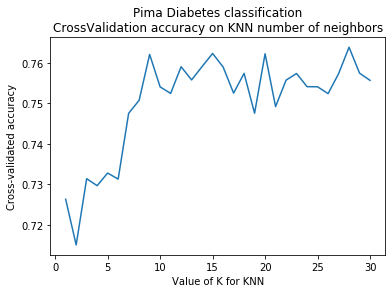

In [54]:
# plot how accuracy changes as we vary nn
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
# plt.plot(x_axis, y_axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.title("Pima Diabetes classification\nCrossValidation accuracy on KNN number of neighbors")

## Using Pipelines in Grid Searches
Using a pipeline in a grid search works the same way as using any other estimator. We
define a parameter grid to search over, and construct a GridSearchCV from the pipeline
and the parameter grid. When specifying the parameter grid, there is a slight
change, though. We need to specify for each parameter which step of the pipeline it
belongs to. Both parameters that we want to adjust, `n_neighbors` and `weights`, are parameters of
KNN, the second step. We gave this step the name "knn". The syntax to define a parameter
grid for a pipeline is to specify for each parameter the step name, followed by __
(a double underscore), followed by the parameter name. To search over the `n_neighbors` parameter
of KNN we therefore have to use `"knn__n_neighbors"` as the key in the parameter grid dictionary,
and similarly for `weights`:

```python
param_grid = {'knn__n_neighbors': list(range(1,21)),
          'knn__weights': ['uniform', 'distance'],
          'knn__p': list(range(1,11))}
```
With this parameter grid we can use GridSearchCV as usual:

```python
pipe = Pipeline([('standardize', StandardScaler()),
                  ('knn', KNeighborsClassifier())
                 ])
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation accuracy: {:.2f}".format(grid.best_score_))
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
print("Best parameters: {}".format(grid.best_params_))
Out[9]:
Best cross-validation accuracy: 0.98
Test set score: 0.97
Best parameters: {'knn__n_neighbors': 1, 'weights': 'uniform'}
```

In contrast to the grid search we did before, now for each split in the cross-validation,
the `MinMaxScaler` is refit with only the training splits and no information is leaked
from the test split into the parameter search.

In [55]:
# Create a pipeline that standardizes the data then creates a model
from pandas import read_csv
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

pima = pd.read_csv('datasets/Pima-Diabetes/diabetes.csv')
X = pima.iloc[:,:-1]
y = pima.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

params = {'knn__n_neighbors': list(range(1,21)),
          'knn__weights': ['uniform', 'distance'],
          'knn__p': list(range(1,11))}
#### create pipeline 
# First, we build a pipeline object by providing it with a list of steps. 
# Each step is a tuple containing a name (any string of your choosing1) and 
# an instance of an estimator
model = Pipeline([('standardize', StandardScaler()),
                  ('knn', KNeighborsClassifier())
                 ])
best_pipe = GridSearchCV(model, params, cv=5, refit=True, verbose=1)
best_pipe.fit(X_train, y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   46.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('standardize',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
                                                             n_jobs=None,
                                                             n_neighbors=5, p=2,
                                                             weights='uniform'))],
                                verbose=False),
      

### Evaluate the best model on the heldout test dataset

Fitting the `GridSearchCV` object not only searches for the best parameters, but also
automatically fits a new model on the whole training dataset with the parameters that
yielded the best cross-validation performance. The
GridSearchCV class provides a very convenient interface to access the retrained
model using the `predict()` and `score()` methods. To evaluate how well the best found
parameters generalize, we can call the `score()` method from the `GridSearchCV` class instance on the test set:

```python
print("Test set score: {:.2f}".format(grid.score(X_test, y_test)))
```

The `predict()` method takes test cases and calculates the predictions for each test case (i.e., without evaluating any metrics).

```python
y_preds = grid.best_estimator_.predict(X_test)
score = accuracy_score(y_test, y_preds)
```

In [56]:
##similarly using the best most and the score method
print(f"Test set score: {best_pipe.score(X_test, y_test):.3f}")

Test set score: 0.682


In [57]:

y_preds = best_pipe.predict(X_test)
score = accuracy_score(y_test, y_preds)

print("Best model:", best_pipe.best_estimator_)
print("Test accuracy:", score)

Best model: Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=11, p=4,
                                      weights='distance'))],
         verbose=False)
Test accuracy: 0.6818181818181818


In [58]:

y_preds = best_pipe.best_estimator_.predict(X_test)
score = accuracy_score(y_test, y_preds)

print("Best model:", best_pipe.best_estimator_)
print("Test accuracy:", score)

Best model: Pipeline(memory=None,
         steps=[('standardize',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=11, p=4,
                                      weights='distance'))],
         verbose=False)
Test accuracy: 0.6818181818181818


### Having a closer look GridSearchCV's experimental results

In [59]:
results = pd.DataFrame(best_pipe.cv_results_)
# we display the transposed table so that it better fits on the page:
display(results.T)

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
mean_fit_time,0.00546517,0.00474362,0.00510464,0.00524068,0.00445132,0.00455141,0.00446119,0.00503702,0.00497942,0.00463018,...,0.00321159,0.00328016,0.00333343,0.00315619,0.00321088,0.0034049,0.00334702,0.00314126,0.00321984,0.00321417
std_fit_time,0.000708403,0.000517993,0.000698261,0.00106603,0.000343725,0.000491629,0.000382282,0.00086243,0.000479676,0.000293929,...,0.000219433,0.000222693,0.000306945,0.00010311,0.000163855,0.000363372,0.000308602,8.52021e-05,0.00012898,0.000255768
mean_score_time,0.00870228,0.00381618,0.00800233,0.00288873,0.021762,0.0169567,0.0213072,0.0178368,0.0233607,0.0167497,...,0.0257476,0.0220289,0.0256559,0.0218041,0.0253817,0.0229247,0.0272133,0.0216364,0.0252485,0.0214365
std_score_time,0.00072954,0.000750503,0.000472967,0.000310579,0.000587928,0.000498277,0.00173143,0.000766472,0.000905997,0.000562753,...,0.000468753,0.00041996,0.000569458,0.000425561,0.000168263,0.00179698,0.00182149,0.000426545,0.000299335,0.000525684
param_knn__n_neighbors,1,1,1,1,1,1,1,1,1,1,...,20,20,20,20,20,20,20,20,20,20
param_knn__p,1,1,2,2,3,3,4,4,5,5,...,6,6,7,7,8,8,9,9,10,10
param_knn__weights,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance,...,uniform,distance,uniform,distance,uniform,distance,uniform,distance,uniform,distance
params,"{'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'distance'}","{'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'distance'}","{'knn__n_neighbors': 1, 'knn__p': 3, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 1, 'knn__p': 3, 'knn__weights': 'distance'}","{'knn__n_neighbors': 1, 'knn__p': 4, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 1, 'knn__p': 4, 'knn__weights': 'distance'}","{'knn__n_neighbors': 1, 'knn__p': 5, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 1, 'knn__p': 5, 'knn__weights': 'distance'}",...,"{'knn__n_neighbors': 20, 'knn__p': 6, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 20, 'knn__p': 6, 'knn__weights': 'distance'}","{'knn__n_neighbors': 20, 'knn__p': 7, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 20, 'knn__p': 7, 'knn__weights': 'distance'}","{'knn__n_neighbors': 20, 'knn__p': 8, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 20, 'knn__p': 8, 'knn__weights': 'distance'}","{'knn__n_neighbors': 20, 'knn__p': 9, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 20, 'knn__p': 9, 'knn__weights': 'distance'}","{'knn__n_neighbors': 20, 'knn__p': 10, 'knn__weights': 'uniform'}","{'knn__n_neighbors': 20, 'knn__p': 10, 'knn__weights': 'distance'}"
split0_test_score,0.666667,0.666667,0.674797,0.674797,0.674797,0.674797,0.658537,0.658537,0.658537,0.658537,...,0.699187,0.699187,0.699187,0.691057,0.699187,0.691057,0.707317,0.699187,0.707317,0.691057
split1_test_score,0.731707,0.731707,0.764228,0.764228,0.764228,0.764228,0.756098,0.756098,0.764228,0.764228,...,0.788618,0.796748,0.796748,0.796748,0.796748,0.788618,0.788618,0.788618,0.788618,0.788618


In [60]:
print(best_pipe.cv_results_.keys())

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_knn__n_neighbors', 'param_knn__p', 'param_knn__weights', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score'])


In [63]:
res_df = pd.DataFrame({"mean_test_score": best_pipe.cv_results_["mean_test_score"], 
              "hyper_params":best_pipe.cv_results_["params"]})
display(res_df)

,mean_test_score,hyper_params
0,0.701973,"{'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'uniform'}"
1,0.701973,"{'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'distance'}"
2,0.721498,"{'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'uniform'}"
3,0.721498,"{'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'distance'}"
4,0.716607,"{'knn__n_neighbors': 1, 'knn__p': 3, 'knn__weights': 'uniform'}"
...,...,...
395,0.736186,"{'knn__n_neighbors': 20, 'knn__p': 8, 'knn__weights': 'distance'}"
396,0.742703,"{'knn__n_neighbors': 20, 'knn__p': 9, 'knn__weights': 'uniform'}"
397,0.737812,"{'knn__n_neighbors': 20, 'knn__p': 9, 'knn__weights': 'distance'}"
398,0.741077,"{'knn__n_neighbors': 20, 'knn__p': 10, 'knn__weights': 'uniform'}"


In [64]:
print("All GRID results\n-----------------------------------------------")
cvres = best_pipe.cv_results_
#cvres is a results data structure. PRINT it!  print(cvres)

for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print("GRID", mean_score, params)
print("\nAll GRID results\n-----------------------------------------------")
#print("grid_search.cv_results_", grid_search.cv_results_)
#estimator : estimator object. This is assumed to implement the scikit-learn estimator interface.  
#            Either estimator needs to provide a score function, or scoring must be passed.
#Accuracy is the default for classification; feel free to change this to precision, recall, fbeta
print("Best score: %0.3f" % best_pipe.best_score_)
print("Best parameters set:")
best_parameters = best_pipe.best_estimator_.get_params()
for param_name in sorted(best_pipe.best_params_.keys()):
    print("\t%s: %r" %(param_name, best_parameters[param_name]))

All GRID results
-----------------------------------------------
GRID 0.7019725443156071 {'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'uniform'}
GRID 0.7019725443156071 {'knn__n_neighbors': 1, 'knn__p': 1, 'knn__weights': 'distance'}
GRID 0.7214980674396907 {'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'uniform'}
GRID 0.7214980674396907 {'knn__n_neighbors': 1, 'knn__p': 2, 'knn__weights': 'distance'}
GRID 0.7166066906570705 {'knn__n_neighbors': 1, 'knn__p': 3, 'knn__weights': 'uniform'}
GRID 0.7166066906570705 {'knn__n_neighbors': 1, 'knn__p': 3, 'knn__weights': 'distance'}
GRID 0.7149673463947754 {'knn__n_neighbors': 1, 'knn__p': 4, 'knn__weights': 'uniform'}
GRID 0.7149673463947754 {'knn__n_neighbors': 1, 'knn__p': 4, 'knn__weights': 'distance'}
GRID 0.7100759696121551 {'knn__n_neighbors': 1, 'knn__p': 5, 'knn__weights': 'uniform'}
GRID 0.7100759696121551 {'knn__n_neighbors': 1, 'knn__p': 5, 'knn__weights': 'distance'}
GRID 0.7117019858723177 {'knn__n_neighbors': 1, 'k

# Task: Wine recognition dataset via  pipelines and gridsearch

Using the previous section(s) as guidance/template, apply a pipeline workflow **on the Wine recognition dataset** which is available via `from sklearn.datasets import load_wine`.

In the case of this problem explore the following and determine the optimal modeling pipeline:

* Determine the optimal value of the number of nearest neighbors for a KNN classifier for the wine quality dateset using N-fold cross validation when n=10.
* should the data be standardized or not?

Please use this section and subsections to do load the data, do EDA etc.

## Load the data

In [ ]:
from sklearn.datasets import load_wine
wine = load_wine()
print(wine.DESCR)

##  EDA

Please explore the data

# Task: Wine recognition dataset via  pipelines and gridsearch

Using the previous section(s) as guidance/template, apply a pipeline workflow **on the Wine recognition dataset** which is available via `from sklearn.datasets import load_wine`.

In the case of this problem explore the following and determine the optimal modeling pipeline:

* Determine the optimal value of the number of nearest neighbors for a KNN classifier for the wine quality dateset using N-fold cross validation when n=10.
* should it be a weight KNN or not
* should the data be standardized or not?

Please  adopt the following code as a basis for this task. 

## Modeling pipeline and gridsearch

This is section 7.2 and will be used as a basis for your quiz submission.
### pipeline without  StandardScaler

Here explore the following and determine the optimal modeling pipeline:

* Determine the optimal value of the number of nearest neighbors (from 1 to 10) for a KNN classifier for the wine quality dateset using N-fold cross validation when n=5.
* should it be a weighted KNN or not
* the data should not be standardized for these experiments


In [ ]:
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd

dataset_name = "Wine Producer identifier"
ds = load_wine()
X_train, X_test, y_train, y_test = train_test_split(ds.data, ds.target, test_size =0.15,
                                                    random_state=0)
###################################################################
# Please complete the code in this section
###################################################################

param_grid = {
               ...
              }

pipe = Pipeline([
    ....
])

###################################################################
# End of code that needs to be provided
###################################################################

grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy',
                   verbose =1)
grid.fit(X_train, y_train)
n, wgt = grid.best_params_['knn__n_neighbors'], grid.best_params_['knn__weights']

# experiment table of results
# del experimentLog
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=[ "CV_Acc_proxy", "Test_Acc", "Dataset", 
                                               "Exp_Desc", "Model", "Hyperparams"])
experimentLog.loc[len(experimentLog)] =[f"{grid.best_score_:10.3f}", 
                                        f"{grid.score(X_test, y_test):10.3f}", 
                                        dataset_name, "predict wine producer RAW data", "KNN",
                                        f"knn__weights={wgt}, k_nn={n}"]
display(experimentLog)


### pipeline with  StandardScaler

Here explore the following and determine the optimal modeling pipeline:

* Determine the optimal value of the number of nearest neighbors (from 1 to 10) for a KNN classifier for the wine quality dateset using N-fold cross validation when n=5.
* Should it be a weighted KNN or not
* The data should be  standardized here


In [ ]:
from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectPercentile, f_regression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

dataset_name = "Wine Producer identifier"
ds = load_wine()
X_train, X_test, y_train, y_test = train_test_split(ds.data, ds.target,  test_size =0.15,
                                                    random_state=0)

###################################################################
# Please complete the code in this section
###################################################################

param_grid = {
               ....
              }

pipe = Pipeline([
    .....
])

###################################################################
# End of code that needs to be provided
###################################################################


grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy',
                   verbose =1)
grid.fit(X_train, y_train)
n, wgt = grid.best_params_['knn__n_neighbors'], grid.best_params_['knn__weights']

# experiment table of results
# del experimentLog
try: experimentLog 
except : experimentLog = pd.DataFrame(columns=[ "CV_Acc_proxy", "Test_Acc", "Dataset", 
                                               "Exp_Desc", "Model", "Hyperparams"])
experimentLog.loc[len(experimentLog)] =[f"{grid.best_score_:10.3f}", 
                                        f"{grid.score(X_test, y_test):10.3f}", 
                                        dataset_name, "predict wine producer std data", "KNN",
                                        f"knn__weights={wgt}, k_nn={n}"]
display(experimentLog)


## end of notebook